In [740]:
%pip install ipython
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



In [741]:
import pandas as pd

import numpy as np

import warnings
warnings.filterwarnings('ignore')

# para pintar
import pylab as plt
import seaborn as sns

# para que salga el grafico
%matplotlib inline

In [742]:
#Load data from attacks.csv
data = pd.read_csv('../data/attacks.csv', encoding = 'latin1')

In [743]:
#Examining Data
data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [744]:
data_orig = data
data.shape

(25723, 24)

In [745]:
#Se guarda una copia de la original con la cual podremos comparar despúes
data_orig.copy()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [746]:
#Renombrar columnas quitando espacios, antes, después y entre medias.Y mayusculas por minúsculas.

In [831]:
new_cols = [c.lower().rstrip().lstrip().replace(' ', '_').replace('(','').replace(')','').replace('/','') for c in data.columns]
new_cols

['case_number',
 'date',
 'year',
 'type',
 'country',
 'area',
 'location',
 'activity',
 'name',
 'sex',
 'age',
 'injury',
 'fatal_yn',
 'time',
 'species',
 'investigator_or_source',
 'pdf',
 'href_formula',
 'href',
 'case_number.1',
 'case_number.2',
 'original_order',
 'unnamed:_22',
 'unnamed:_23']

In [832]:
dict(zip(data.columns, new_cols))

{'case_number': 'case_number',
 'date': 'date',
 'year': 'year',
 'type': 'type',
 'country': 'country',
 'area': 'area',
 'location': 'location',
 'activity': 'activity',
 'name': 'name',
 'sex': 'sex',
 'age': 'age',
 'injury': 'injury',
 'fatal_(y/n)': 'fatal_yn',
 'time': 'time',
 'species': 'species',
 'investigator_or_source': 'investigator_or_source',
 'pdf': 'pdf',
 'href_formula': 'href_formula',
 'href': 'href',
 'case_number.1': 'case_number.1',
 'case_number.2': 'case_number.2',
 'original_order': 'original_order',
 'unnamed:_22': 'unnamed:_22',
 'unnamed:_23': 'unnamed:_23'}

In [833]:
data = data.rename(columns={k:v for k,v in zip(data.columns, new_cols)})

In [834]:
data.head()

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_yn,time,species,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,unnamed:_22,unnamed:_23
0,2018.06.25,Jun,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,Shark White,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,0,0.0
1,2018.06.18,Jun,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,Unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,0,0.0
7,2018.05.27,May,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,nan,Shark Lemon,"K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,0,0.0
8,2018.05.26.b,May,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,17h00,Shark Bull,"K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0,0,0.0
9,2018.05.26.a,May,2018.0,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Standing,male,M,12,Minor injury to foot,N,14h00,Unknown,"K. McMurray, Tracking Sharks.com",2018.05.26.a-DaytonaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.a,2018.05.26.a,6294.0,0,0.0


In [835]:
#Valores nulos por columnas.
nan_cols = data.isna().sum()
nan_cols[nan_cols>0]

age    10
dtype: int64

In [836]:
#Borramos duplicados.
data[data.duplicated(keep=False)]

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_yn,time,species,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,unnamed:_22,unnamed:_23


In [837]:
data.drop_duplicates().shape, data.shape

((2340, 24), (2340, 24))

In [838]:
data.drop_duplicates(inplace=True)

In [839]:
data.drop_duplicates().shape, data.shape

((2340, 24), (2340, 24))

In [840]:
#Borrar index que tienen valores nulos en las tres columnas del lugar del ataque, Country, Area, Location.
no_local = data[data.country.isnull() & data.area.isnull() & data.location.isnull()].index
data.drop(no_local, axis=0, inplace=True)

In [841]:
data.shape

(2340, 24)

In [842]:
#Porcentaje de datos por paises.
data_porcentaje = data['country'].value_counts()/ 6273*100
data_porcentaje

USA             21.919337
AUSTRALIA       10.011159
SOUTH AFRICA     5.372230
Name: country, dtype: float64

In [843]:
#Centro mi análisis en los tres países con mayor número de ataques. Usa, Australia y South Africa. Elimino lo demás.

no_country = data[(data['country']!="USA") & (data['country']!="AUSTRALIA")& (data['country']!="SOUTH AFRICA")].index
no_country
data.drop(no_country, axis=0, inplace=True)
data.shape

(2340, 24)

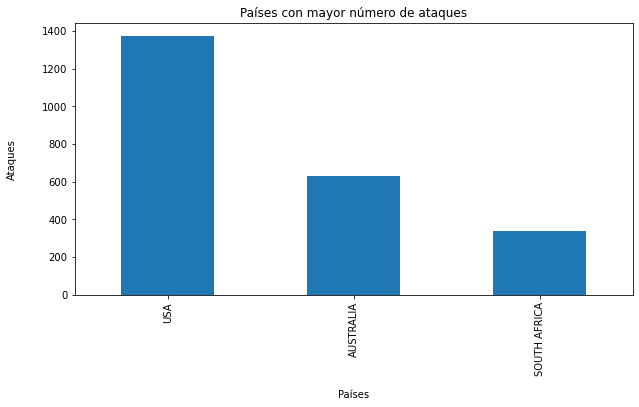

In [844]:
plt.figure(figsize=(10, 5))

data.country.value_counts().plot.bar();
plt.xlabel('Países', labelpad=14)
plt.ylabel('Ataques', labelpad=25)
plt.title('Países con mayor número de ataques');


In [845]:
#Borrar las filas que tienen valores nulos en la columna sex.
data.dropna(inplace=True, subset=['sex'])

In [846]:
data.shape

(2340, 24)

In [848]:
#Borrar las filas que tienen valores nulos en la columna Fatal.
data.dropna(inplace=True, subset=['fatal_yn'])

In [849]:
data.shape

(2340, 24)

In [851]:
#Borrado de todo lo que no sea Yes o No en la columna fatal.
no_fatal = data[(data['fatal_yn']!="Y") & (data['fatal_yn']!="N")& (data['fatal_yn']!="y") & (data['fatal_yn']!="n")].index
data.drop(no_fatal, axis=0, inplace=True)
data.shape

(2340, 24)

In [853]:
data['fatal_yn'].unique()

['N', 'Y']
Categories (2, object): ['N', 'Y']

In [854]:
data

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_yn,time,species,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,unnamed:_22,unnamed:_23
0,2018.06.25,Jun,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,Shark White,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,0,0.0
1,2018.06.18,Jun,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,Unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,0,0.0
7,2018.05.27,May,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,nan,Shark Lemon,"K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,0,0.0
8,2018.05.26.b,May,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,17h00,Shark Bull,"K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0,0,0.0
9,2018.05.26.a,May,2018.0,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Standing,male,M,12,Minor injury to foot,N,14h00,Unknown,"K. McMurray, Tracking Sharks.com",2018.05.26.a-DaytonaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.a,2018.05.26.a,6294.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5528,1902.11.10,Nov,1902.0,Unprovoked,AUSTRALIA,New South Wales,"Middle Harbour, Sydney",Swimming,Howard Dent,M,17,FATAL,Y,Afternoon,Unknown,"The Advertiser, 11/11/1902",1902.11.10-Dent.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1902.11.10,1902.11.10,775.0,0,0.0
5541,1902.01.19,Jan,1902.0,Unprovoked,AUSTRALIA,Queensland,Brisbane,Swimming,Charles Jones,M,16,Legs bitten,N,12h00,Unknown,"Brisbane Courier, 1/20/1902",1902.01.19-Jones.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1902.01.19,1902.01.19,762.0,0,0.0
5542,1901.12.01,Unknown,1901.0,Unprovoked,AUSTRALIA,Queensland,Brisbane,Others,William Quince,M,10,Lacerations to torso & thigh,N,nan,Unknown,"The Argus, 12/2/1901",1901.12.01-Quince.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1901.12.01,1901.12.01,761.0,0,0.0
5545,1901.07.30,Jul,1901.0,Unprovoked,SOUTH AFRICA,Western Cape Province,Windmill Beach,Swimming,"John Hendrick Adrian Chandler, a prisoner of war",M,29,"Right leg bitten & foot severed, right arm bit...",Y,14h15,Shark White,"M. Levine, GSAF",1901.07.30-Chandler.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1901.07.30,1901.07.30,758.0,0,0.0


In [861]:
#Borrado de todo lo que no sea Femenino o Masculino en la columna Sex.
no_sex = data[(data['sex']!="M") & (data['sex']!="F")].index
no_sex.shape
data.drop(no_sex, axis=0, inplace=True)
data.shape

(2340, 24)

In [862]:
data['sex'].unique()

['F', 'M']
Categories (2, object): ['F', 'M']

In [863]:
#Borrado de todos los años por debajo del año 1900. Mi análisis se centra en el siglo XX/XXI
no_year = data[(data['year']<1900)].index
no_year.shape
data.drop(no_year, axis=0, inplace=True)
data.shape

(2340, 24)

In [864]:
data['year'] = data['year'].astype(int)

In [865]:
data.year.unique()

array([2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008,
       2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997,
       1996, 1995, 1984, 1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987,
       1986, 1985, 1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976, 1975,
       1974, 1973, 1972, 1971, 1970, 1969, 1968, 1967, 1966, 1965, 1964,
       1963, 1962, 1961, 1960, 1959, 1958, 1957, 1956, 1955, 1954, 1953,
       1952, 1951, 1950, 1949, 1948, 1947, 1946, 1945, 1944, 1943, 1942,
       1941, 1940, 1939, 1938, 1937, 1936, 1935, 1934, 1933, 1932, 1931,
       1930, 1929, 1928, 1927, 1926, 1925, 1924, 1923, 1922, 1921, 1920,
       1919, 1918, 1916, 1915, 1914, 1913, 1912, 1911, 1909, 1908, 1907,
       1906, 1905, 1902, 1901, 1900])

In [866]:
data['type'].unique()

['Boating', 'Unprovoked', 'Provoked', 'Sea Disaster', 'Boat']
Categories (5, object): ['Boat', 'Boating', 'Provoked', 'Sea Disaster', 'Unprovoked']

In [867]:
#Comprobando columna por columna los valores invalidos y eliminandolos si no suponen perdida de información:

In [868]:
#Columna Type
no_type = data[(data['type']=='Invalid')].index
data.drop(no_type, axis=0, inplace=True)
data.shape

(2340, 24)

In [869]:
#Rellenar valores desconocidos con unknow en la columna area porque centraremos los datos por países. Y lo mismmo con Location.
data.fillna({'area': 0, 'name': 'unknown'}, inplace=True)

In [870]:
data.fillna({'location': 0, 'name': 'unknown'}, inplace=True)

In [871]:
#Las columnas Case_number y href_formula tienen un solo valor único asi que los transformamos a unknow.
data.fillna({'case_number': 0, 'name': 'unknown'}, inplace=True)
data.fillna({'href_formula': 0, 'name': 'unknown'}, inplace=True)

TypeError: Cannot setitem on a Categorical with a new category (0), set the categories first

In [ ]:
#valores nulos en species pasarlos a unknow.
data.fillna({'species': 0, 'name': 'unknown'}, inplace=True)

In [872]:
#Convertir columna Species a un string.
data['species'] = data['species'].astype(str)

In [781]:
#Limpieza columna Species, ordenandolos por los tipos de especies de tiburón más comunes.
new_Species = []
for i in data['species']:
    if i.find('White') >= 0:
        new_Species.append('Shark White')
    elif i.find('Tiger') >= 0:
        new_Species.append('Shark Tiger')
    elif i.find('Small') >= 0:
        new_Species.append('Shark Small')
    elif i.find('Dusky') >= 0:
        new_Species.append('Shark Dusky')
    elif i.find('Blue') >= 0:
        new_Species.append('Shark Blue')
    elif i.find('Bull') >= 0:
        new_Species.append('Shark Bull')
    elif i.find('Sand') >= 0:
        new_Species.append('Shark Sand')
    elif i.find('Gray') >= 0:
        new_Species.append('Shark Gray')
    elif i.find('Reef') >= 0:
        new_Species.append('Shark Reef')
    elif i.find('Wobbegong') >= 0:
        new_Species.append('Shark Wobbegong')
    elif i.find('Bronze') >= 0:
        new_Species.append('Shark Bronze')
    elif i.find('Lemon') >= 0:
        new_Species.append('Shark Lemon')
    elif i.find('Blacktip') >= 0:
        new_Species.append('Shark Blacktip')
    elif i.find('Nurse') >= 0:
        new_Species.append('Shark Nurse')
    elif i.find('Zambesi') >= 0:
        new_Species.append('Shark Zambesi')
    elif i.find('Mako') >= 0:
        new_Species.append('Shark Mako')
    elif i.find('Leopard') >= 0:
        new_Species.append('Shark Leopard')
    elif i.find('Raggedtooth') >= 0:
        new_Species.append('Shark Raggedtoot')
    elif i.find('Spinner') >= 0:
        new_Species.append('Shark Spinner')
    elif i.find('Sevengill') >= 0:
        new_Species.append('Shark Sevengill')
    elif i.find('Salmon') >= 0:
        new_Species.append('Shark Salmon')
    elif i.find('Hammerhead') >= 0:
        new_Species.append('Shark Hammerhead')
    elif i.find('Galapagos') >= 0:
        new_Species.append('Shark Galapagos')
    elif i.find('dogfish') >= 0:
        new_Species.append('Shark dogfish')
    elif i.find('Copper') >= 0:
        new_Species.append('Shark Copper')
    elif i.find('Carpet') >= 0:
        new_Species.append('Shark Carpet')
    else:
        new_Species.append('Unknown')
data['species'] = new_Species

In [782]:
data['species'].unique()

array(['Shark White', 'Unknown', 'Shark Lemon', 'Shark Bull',
       'Shark Tiger', 'Shark Wobbegong', 'Shark Blacktip',
       'Shark Spinner', 'Shark Nurse', 'Shark Sand', 'Shark dogfish',
       'Shark Bronze', 'Shark Reef', 'Shark Hammerhead', 'Shark Mako',
       'Shark Blue', 'Shark Raggedtoot', 'Shark Small', 'Shark Salmon',
       'Shark Galapagos', 'Shark Sevengill', 'Shark Zambesi',
       'Shark Dusky', 'Shark Leopard', 'Shark Carpet', 'Shark Copper',
       'Shark Gray'], dtype=object)

In [819]:
species_unknown = data[(data['species']!="Unknown")].index

In [821]:
species_unknown.shape

(667,)

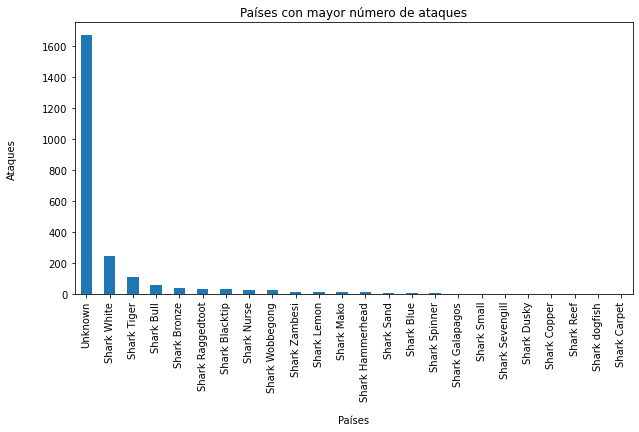

In [874]:
plt.figure(figsize=(10, 5))

data.species.value_counts().plot.bar();
plt.xlabel('Países', labelpad=14)
plt.ylabel('Ataques', labelpad=25)
plt.title('Países con mayor número de ataques');

In [783]:
#Limpieza columna Date.
new_dates = []
for i in data['date']:
    if i.find('Jan') >= 0:
        new_dates.append('Jan')
    elif i.find('Feb') >= 0:
        new_dates.append('Feb')
    elif i.find('Mar') >= 0:
        new_dates.append('Mar')
    elif i.find('Apr') >= 0:
        new_dates.append('Apr')
    elif i.find('May') >= 0:
        new_dates.append('May')
    elif i.find('Jun') >= 0:
        new_dates.append('Jun')
    elif i.find('Jul') >= 0:
        new_dates.append('Jul')
    elif i.find('Aug') >= 0:
        new_dates.append('Aug')     
    elif i.find('Sep') >= 0:
        new_dates.append('Sep')
    elif i.find('Oct') >= 0:
        new_dates.append('Oct')
    elif i.find('Nov') >= 0:
        new_dates.append('Nov')
    elif i.find('Dic') >= 0:
        new_dates.append('Dic')
    else:
        new_dates.append('Unknown')
data.date = new_dates

In [784]:
data['date'].unique()

array(['Jun', 'May', 'Apr', 'Mar', 'Feb', 'Jan', 'Unknown', 'Nov', 'Oct',
       'Sep', 'Aug', 'Jul'], dtype=object)

In [785]:
#valores nulos en age pasarlos a unknow.
data.fillna({'age': 0, 'name': 'unknown'}, inplace=True)

In [786]:
#valores nulos de las últimas dos columnas pasarlos a unknow.
data.fillna({'unnamed:_22': 0, 'name': 'unknown'}, inplace=True)
data.fillna({'unnamed:_23': 0, 'name': 'unknown'}, inplace=True)

In [787]:
#Convertir a string.
data['age'] = data['age'].astype(str)

In [788]:
#Convertir a string.
data['time'] = data['time'].astype(str)
data['activity'] = data['activity'].astype(str)
data['investigator_or_source'] = data['investigator_or_source'].astype(str)

In [789]:
#Reemplazamos valores inconsistentes por otros más fiables.
dic = {'Teen':'15', '60s':'60',
        '40s':'40', '20s':'20', '50s':'50', 'teen':'15', '30s':'30',
        '12 or 13':'12', 'Teens':'15', '\xa0 ':None, '30 or 36':'35',
       '6½':'6', '33 or 37':'33', 'mid-30s':'30', '7      &    31':None,
       "60's":'60', 'Elderly':None, ' ':None, '74 ':'74', '45 ':'45', '21 or 26':'25',
       '>50':'50', 'adult':None, '25 or 28':'25', '30 & 32':'30', '17 & 35':None, ' 43':'43', '"young"':None, 
       'F':None, 'Both 11':'11', 'young':'20', '  ':None, '?    &   14':None, '10 or 12':'10',
       '31 or 33':'31', '2½':'2'}

data.replace({'age':dic}, inplace=True)


In [790]:
data.age = data.age.str.replace('nan', 'unknown')

In [791]:
data.loc[data['year'] ==0] = None

In [792]:
data_edad = data[data['age'] == '0'].index
data.drop(index = data_edad, inplace = True)

In [793]:
data_edad = data[data['age'] == ' '].index
data.drop(index = data_edad, inplace = True)

In [794]:
data['age'].unique()

array(['57', '11', '52', '15', '12', '32', '10', '34', '60', '33', '29',
       '41', '37', '19', '25', '69', '18', '38', '55', '35', '28', '54',
       '14', '7', '31', '17', '40', '3', '13', '50', '46', '16', '48',
       '20', '21', '51', '39', '58', '30', '26', '22', '47', '61', '65',
       '73', '42', '36', '66', '43', '9', '49', '59', '6', '64', '23',
       '45', '71', '44', '27', '62', '68', '63', '70', '24', '53', '8',
       '74', '56', '5', '86', '77', '84', None, ' 30', ' 28', '87', '75',
       '78'], dtype=object)

In [795]:
data.shape

(2340, 24)

In [796]:
data['activity'] = data['activity'].astype(str)

In [797]:
#Reagrupar las actividades que realizaban en el momento del ataque en 12 categorías.
acti = []

for i in data['activity']:
    if i.find('Surfing')>= 0 or i.find('surfing')>= 0 or i.find('Scurfing')>= 0 or i.find('scurfing')>= 0 or i.find('Scurfing')>= 0:
        acti.append('Surfing')
    elif i.find('Paddling')>= 0 or i.find('Paddle')>= 0 or i.find('paddling')>= 0 or i.find('paddle')>= 0:
        acti.append('Paddling')
    elif i.find('Standing')>= 0 or i.find('standing') >= 0:
        acti.append('Standing')
    elif i.find('Fishing')>= 0 or i.find('fishing')>= 0 or i.find('Spearfishing')>= 0 or i.find('spearfishing')>= 0:
        acti.append('Fishing')
    elif i.find('Walking')>= 0 or i.find('walking')>= 0:
        acti.append('Walking')
    elif i.find('Kayak')>= 0 or i.find('kayak')>= 0 or i.find('Kayaking')>= 0:
        acti.append('Kayaking')
    elif i.find('Snorkeling')>= 0 or i.find('snorkeling')>= 0:
        acti.append('Snorkeling')
    elif i.find('Paddling')>= 0 or i.find('Paddle')>= 0:
        acti.append('Paddling')
    elif i.find('Swimming')>= 0 or i.find('swimming')>= 0 or i.find('Finning')>= 0 or i.find('finning') >= 0:
        acti.append('Swimming')
    elif i.find('Boarding')>= 0 or i.find('boarding')>= 0:
        acti.append('Boarding')
    elif i.find('Windsurfing')>= 0 or i.find('windsurfing')>= 0 or i.find('windsurf')>= 0 or i.find('Windsurf')>= 0:
        acti.append('Windsurfing')
    elif i.find('Diving')>= 0 or i.find('diving')>= 0 or i.find('Skindiving')>= 0 or i.find('skindiving')>= 0:
        acti.append('Diving')
    elif i.find('sailing')>= 0 or i.find('Sailing')>= 0 or i.find('Sailboarding')>= 0:
        acti.append('Sailing')
    else:
        acti.append('Others')
        
data.activity = acti

In [798]:
data['activity'].unique()

array(['Paddling', 'Standing', 'Fishing', 'Walking', 'Others', 'Boarding',
       'Swimming', 'Surfing', 'Diving', 'Snorkeling', 'Kayaking',
       'Sailing'], dtype=object)

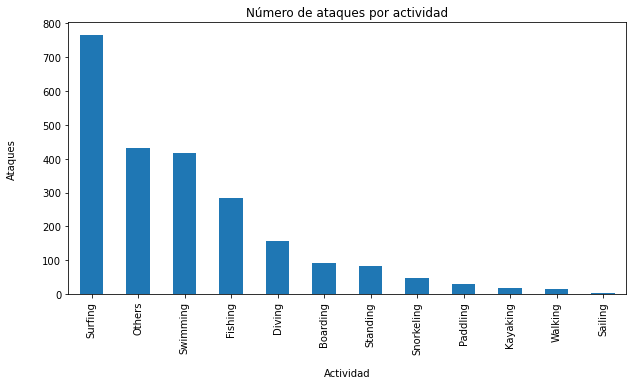

In [800]:
plt.figure(figsize=(10, 5))

data.activity.value_counts().plot.bar();
plt.xlabel('Actividad', labelpad=14)
plt.ylabel('Ataques', labelpad=25)
plt.title('Número de ataques por actividad');

In [801]:
nan_cols = data.isna().sum()
nan_cols[nan_cols>0]

age    10
dtype: int64

In [802]:
#Muestra la info de los datos. Las columnas con datos object ocupan mayor espacio, por lo que nos interesa pasar esos datos a categóricos.
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340 entries, 0 to 5552
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_number             2340 non-null   object 
 1   date                    2340 non-null   object 
 2   year                    2340 non-null   float64
 3   type                    2340 non-null   object 
 4   country                 2340 non-null   object 
 5   area                    2340 non-null   object 
 6   location                2340 non-null   object 
 7   activity                2340 non-null   object 
 8   name                    2340 non-null   object 
 9   sex                     2340 non-null   object 
 10  age                     2330 non-null   object 
 11  injury                  2340 non-null   object 
 12  fatal_(y/n)             2340 non-null   object 
 13  time                    2340 non-null   object 
 14  species                 2340 non-null   

In [803]:
for c in data.select_dtypes('object').columns:
    data[c] = data[c].astype('category')

In [804]:
data.info(memory_usage='deep')
#Hemos cambiado los object por datos categóricos. Y como vemos la memoria usada a disminuido. Pasando de 22.8 Mb a 8.4 Mb.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340 entries, 0 to 5552
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   case_number             2340 non-null   category
 1   date                    2340 non-null   category
 2   year                    2340 non-null   float64 
 3   type                    2340 non-null   category
 4   country                 2340 non-null   category
 5   area                    2340 non-null   category
 6   location                2340 non-null   category
 7   activity                2340 non-null   category
 8   name                    2340 non-null   category
 9   sex                     2340 non-null   category
 10  age                     2330 non-null   category
 11  injury                  2340 non-null   category
 12  fatal_(y/n)             2340 non-null   category
 13  time                    2340 non-null   category
 14  species                 

In [805]:
#Optimización de memoria. Pasamos los float64 a float32, que ocuparán la mitad del tamaño en la memoria.
for c in data.select_dtypes('float').columns:
    data[c] = pd.to_numeric(data[c], downcast='float')

In [806]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340 entries, 0 to 5552
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   case_number             2340 non-null   category
 1   date                    2340 non-null   category
 2   year                    2340 non-null   float32 
 3   type                    2340 non-null   category
 4   country                 2340 non-null   category
 5   area                    2340 non-null   category
 6   location                2340 non-null   category
 7   activity                2340 non-null   category
 8   name                    2340 non-null   category
 9   sex                     2340 non-null   category
 10  age                     2330 non-null   category
 11  injury                  2340 non-null   category
 12  fatal_(y/n)             2340 non-null   category
 13  time                    2340 non-null   category
 14  species                 

In [807]:
data.to_csv('DataLimpieza99.csv', index=True, sep=';')